# Twitter Sentiment Analysis: Semester Project

#### FIRST THING FIRST .... Loading the dataset into dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

In [2]:
dataset = pd.DataFrame()

In [3]:
dataset = pd.read_csv('Tweets_Dataset.txt', delimiter = '\t', names = ['Seq No','Topic','label', 'Tweet'] )

In [4]:
dataset.head(-10)

,Seq No,Topic,label,Tweet
0,801989080477154944,#ArianaGrande,0,#ArianaGrande Ari By Ariana Grande 80% Full ht...
1,801989272341453952,#ArianaGrande,1,Ariana Grande KIIS FM Yours Truly CD listening...
2,801990978424962944,#ArianaGrande,1,Ariana Grande White House Easter Egg Roll in W...
3,801996232553963008,#ArianaGrande,1,#CD #Musics Ariana Grande Sweet Like Candy 3.4...
4,801998343442407040,#ArianaGrande,1,SIDE TO SIDE 😘 @arianagrande #sidetoside #aria...
...,...,...,...,...
11995,805687944241516544,zac efron,0,#ZacEfron and Seth Rogen Are Shirtless and Wea...
11996,805687959026601984,zac efron,0,5 Incidents of How Zac Efron Is Inspirational ...
11997,805689537024274434,zac efron,0,Alexandra Daddario on Working with Zac Efron a...
11998,805692823752146944,zac efron,1,There could be a thousand more Hairspray remak...


In [5]:
dataset.isnull().sum()

Seq No    0
Topic     0
label     0
Tweet     0
dtype: int64

In [6]:
dataset['label'].unique()

array([ 0,  1, -1,  2, -2], dtype=int64)

In [7]:
result = dataset.groupby('label').count()

In [8]:
result.Tweet

label
-2     175
-1    3408
 0    5988
 1    2308
 2     131
Name: Tweet, dtype: int64

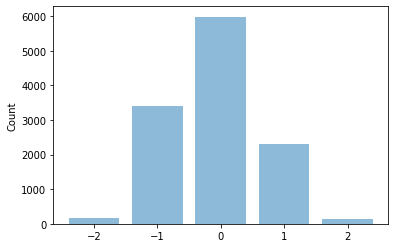

In [9]:
plt.bar(result.index,result.Tweet, align='center', alpha=0.5)
plt.xticks(result.index)
plt.ylabel('Count')
plt.show()

In [ ]:
#Cleaing Tweets

In [10]:
pd.set_option('display.max_colwidth', -1)
dataset.Tweet.head()

0    #ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA                             
1    Ariana Grande KIIS FM Yours Truly CD listening party in Burbank https://t.co/ClQIcx8Z6V #ArianaGrande                                    
2    Ariana Grande White House Easter Egg Roll in Washington https://t.co/jdjL9swWM8 #ArianaGrande                                            
3    #CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New https://t.co/oFmp0bOvZy… https://t.co/WIHLch9KtK
4    SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈  #LOTB… https://t.co/tEd8rftAxV                   
Name: Tweet, dtype: object

In [11]:
dataset = dataset.drop(['Seq No','Topic'],axis=1)

In [12]:
def TidyTweets(string):
    
    esp = "【|】|\?|\!|\(|\)"  
    # for removing twitter handles
    handlepattern = "#\w*|@\w*"
    hashtags = "#\w*"
    #punctuationpattern = "[^a-zA-Z]" 
    urlpattern = "http\S+"
    tweet = re.sub(urlpattern,"",string)
    tweet = re.sub(handlepattern,"",tweet)
    #tweet = re.sub(punctuationpattern," ",tweet)
    hashtags = "#\w*"
    tweet = re.sub("-","",tweet)
    tweet = re.sub(esp,"",tweet)
    tweet = re.sub('\s+',' ',tweet)
    return tweet
    #tweet = re.sub(hashtags," ",string)
    
    
    #reg = re.compile(r'({})|[^a-zA-Z]|http\S*'.format(emoji_pat)) # line a
    #result = reg.sub(lambda x: ' {} '.format(x.group(1)) if x.group(1) else ' ', tweet)
   # result = re.sub(" 🏼"," ",result)
    #result = re.sub("-"," ",result)
    #return shrink_whitespace_reg.sub(' ', result)

#Testing the functionality    
a = TidyTweets("@ariana Grande @ypu Don't    ()()      -    call me #Angle OLALALALA!!🤘🏼🌈   ")
print(a)

 Grande Don't call me OLALALALA🤘🏼🌈 


In [13]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def StopWords(string):
    tweet_tokenizer  = TweetTokenizer()
    tweet_tokenizer =  (tweet_tokenizer.tokenize(string))
    return  " ".join([w for w in tweet_tokenizer if not w in stop_words])

print(StopWords("Ari By the Ariana Grande 0 Full"))

Ari By Ariana Grande 0 Full


In [14]:
dataset['TidyTweet'] =  dataset['Tweet'].apply(lambda x: TidyTweets(x))

In [15]:
dataset[(dataset.label == 0)]

,label,Tweet,TidyTweet
0,0,#ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA,Ari By Ariana Grande 80% Full
8,0,Ariana Grande 【Right There ft. Big Sean】#アリアナ #arianagrande https://t.co/4rZOKYDnut,Ariana Grande Right There ft. Big Sean
9,0,which one would you prefer to listen to for a whole day? 😍🤘🏼; i could never choose #arianagrande #IntoYou #SideToSide #songs #Poll,which one would you prefer to listen to for a whole day 😍🤘🏼; i could never choose
10,0,Booty Baby Ari#ArianaGrande #PrincessAri #bootybaby #DangerousWomanTour #DangerousWoman… https://t.co/YBspYl06Xn,Booty Baby Ari …
11,0,"#LindsayLohan backs out of a #Kettering holiday appearance, just after throwing shade at #ArianaGrande. #LiLohttps://t.co/G2sNgjVCHd","backs out of a holiday appearance, just after throwing shade at ."
...,...,...,...
11997,0,Alexandra Daddario on Working with Zac Efron and Dwayne Johnson on Baywatch #ZacEfron https://t.co/37bJaRvqWY https://t.co/xusCry14Hz,Alexandra Daddario on Working with Zac Efron and Dwayne Johnson on Baywatch
11999,0,"@M_acelin To name a few: James Marsden, Nikki Blonksy, Taylor Parks, Elijah Kelley, Michelle Pfeifer, fucking John Travolta and Zac Efron","To name a few: James Marsden, Nikki Blonksy, Taylor Parks, Elijah Kelley, Michelle Pfeifer, fucking John Travolta and Zac Efron"
12001,0,✨✔😘😘Defeat The Ghost For Me! 👻 🔥🐠John Smith🔱🇨🇦:Zac Efron & beahttps://t.co/5kR4nbliE9 https://t.co/j8XdkHbi5A,✨✔😘😘Defeat The Ghost For Me 👻 🔥🐠John Smith🔱🇨🇦:Zac Efron & bea
12006,0,#zac efron sex pic skins michelle sex https://t.co/EQFbbfuJSA,efron sex pic skins michelle sex


In [16]:
def casefolding_Tweets(tweet):
    low=""
    for word in tweet:
        low += (word.casefold())
    return low

In [17]:
print(casefolding_Tweets("QASDDDF"))

qasdddf


In [18]:
dataset['TidyTweet'] =  dataset['TidyTweet'].apply(lambda x: casefolding_Tweets(x))

In [19]:
dataset.head(60)

,label,Tweet,TidyTweet
0,0,#ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA,ari by ariana grande 80% full
1,1,Ariana Grande KIIS FM Yours Truly CD listening party in Burbank https://t.co/ClQIcx8Z6V #ArianaGrande,ariana grande kiis fm yours truly cd listening party in burbank
2,1,Ariana Grande White House Easter Egg Roll in Washington https://t.co/jdjL9swWM8 #ArianaGrande,ariana grande white house easter egg roll in washington
3,1,#CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New https://t.co/oFmp0bOvZy… https://t.co/WIHLch9KtK,ariana grande sweet like candy 3.4 oz 100 ml sealed in box 100% authenic new
4,1,SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈 #LOTB… https://t.co/tEd8rftAxV,side to side 😘 🌈 …
5,1,Hairspray Live! Previews at the Macy's Thanksgiving Day Parade! https://t.co/GaFTqInolL #arianagrande #televisionnbc,hairspray live previews at the macy's thanksgiving day parade
6,1,#LindsayLohan Is ‘Feeling Thankful’ After Blasting #ArianaGrande For Wearing ‘#TooMuch… https://t.co/Acf8ogvPxd https://t.co/EOSHtG9ay4,is ‘feeling thankful’ after blasting for wearing ‘…
7,-1,I hate her but... I love her songs Dammit ._.#ArianaGrande,i hate her but... i love her songs dammit ._.
8,0,Ariana Grande 【Right There ft. Big Sean】#アリアナ #arianagrande https://t.co/4rZOKYDnut,ariana grande right there ft. big sean
9,0,which one would you prefer to listen to for a whole day? 😍🤘🏼; i could never choose #arianagrande #IntoYou #SideToSide #songs #Poll,which one would you prefer to listen to for a whole day 😍🤘🏼; i could never choose


In [20]:
from  nltk.stem.porter import*
stemmer = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [21]:
dataset['TidyTweetSt'] = (dataset['TidyTweet'].apply(stem_sentences))

In [22]:
dataset.head()

,label,Tweet,TidyTweet,TidyTweetSt
0,0,#ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA,ari by ariana grande 80% full,ari by ariana grand 80% full
1,1,Ariana Grande KIIS FM Yours Truly CD listening party in Burbank https://t.co/ClQIcx8Z6V #ArianaGrande,ariana grande kiis fm yours truly cd listening party in burbank,ariana grand kii fm your truli cd listen parti in burbank
2,1,Ariana Grande White House Easter Egg Roll in Washington https://t.co/jdjL9swWM8 #ArianaGrande,ariana grande white house easter egg roll in washington,ariana grand white hous easter egg roll in washington
3,1,#CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New https://t.co/oFmp0bOvZy… https://t.co/WIHLch9KtK,ariana grande sweet like candy 3.4 oz 100 ml sealed in box 100% authenic new,ariana grand sweet like candi 3.4 oz 100 ml seal in box 100% authen new
4,1,SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈 #LOTB… https://t.co/tEd8rftAxV,side to side 😘 🌈 …,side to side 😘 🌈 …


In [ ]:
#tweet_tokenizer  = TweetTokenizer()
#def tweetToken(tweet):
#    return tweet_tokenizer.tokenize(tweet)

In [23]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
def lemmatize_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [24]:
dataset['TidyTweetLT'] = (dataset['TidyTweet'].apply(lemmatize_sentences))

In [25]:
dataset.head(50)

,label,Tweet,TidyTweet,TidyTweetSt,TidyTweetLT
0,0,#ArianaGrande Ari By Ariana Grande 80% Full https://t.co/ylhCMETHHW #Singer #Actress https://t.co/lTrb1JQiEA,ari by ariana grande 80% full,ari by ariana grand 80% full,ari by ariana grande 80% full
1,1,Ariana Grande KIIS FM Yours Truly CD listening party in Burbank https://t.co/ClQIcx8Z6V #ArianaGrande,ariana grande kiis fm yours truly cd listening party in burbank,ariana grand kii fm your truli cd listen parti in burbank,ariana grande kiis fm yours truly cd listening party in burbank
2,1,Ariana Grande White House Easter Egg Roll in Washington https://t.co/jdjL9swWM8 #ArianaGrande,ariana grande white house easter egg roll in washington,ariana grand white hous easter egg roll in washington,ariana grande white house easter egg roll in washington
3,1,#CD #Musics Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100% Authenic New https://t.co/oFmp0bOvZy… https://t.co/WIHLch9KtK,ariana grande sweet like candy 3.4 oz 100 ml sealed in box 100% authenic new,ariana grand sweet like candi 3.4 oz 100 ml seal in box 100% authen new,ariana grande sweet like candy 3.4 oz 100 ml sealed in box 100% authenic new
4,1,SIDE TO SIDE 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈 #LOTB… https://t.co/tEd8rftAxV,side to side 😘 🌈 …,side to side 😘 🌈 …,side to side 😘 🌈 …
5,1,Hairspray Live! Previews at the Macy's Thanksgiving Day Parade! https://t.co/GaFTqInolL #arianagrande #televisionnbc,hairspray live previews at the macy's thanksgiving day parade,hairspray live preview at the macy' thanksgiv day parad,hairspray live preview at the macy's thanksgiving day parade
6,1,#LindsayLohan Is ‘Feeling Thankful’ After Blasting #ArianaGrande For Wearing ‘#TooMuch… https://t.co/Acf8ogvPxd https://t.co/EOSHtG9ay4,is ‘feeling thankful’ after blasting for wearing ‘…,is ‘feel thankful’ after blast for wear ‘…,is ‘feeling thankful’ after blasting for wearing ‘…
7,-1,I hate her but... I love her songs Dammit ._.#ArianaGrande,i hate her but... i love her songs dammit ._.,i hate her but... i love her song dammit ._.,i hate her but... i love her song dammit ._.
8,0,Ariana Grande 【Right There ft. Big Sean】#アリアナ #arianagrande https://t.co/4rZOKYDnut,ariana grande right there ft. big sean,ariana grand right there ft. big sean,ariana grande right there ft. big sean
9,0,which one would you prefer to listen to for a whole day? 😍🤘🏼; i could never choose #arianagrande #IntoYou #SideToSide #songs #Poll,which one would you prefer to listen to for a whole day 😍🤘🏼; i could never choose,which one would you prefer to listen to for a whole day 😍🤘🏼; i could never choos,which one would you prefer to listen to for a whole day 😍🤘🏼; i could never choose


In [26]:
dataset['TidyTweetLT'] =  dataset['TidyTweetLT'].apply(StopWords)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2000,min_df=5)
x = cv.fit_transform(dataset['TidyTweetLT']).toarray()
y = dataset.iloc[:, 0].values

print(x.shape)
print(y.shape)

(12010, 2000)
(12010,)


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)
print(x_train.shape)
print(x_test.shape)

(9608, 2000)
(2402, 2000)


In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)
scores_randomforest = []
model  = RandomForestClassifier()

for train_index,test_index in folds.split(x,y):
    X_train,X_test,y_train,y_test = x[train_index],x[test_index],y[train_index],y[test_index]
#     scores_randomforest.append(get_score(model,X_train,X_test,y_train,y_test))
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    scores_randomforest.append(model.score(X_test,y_test))

KeyboardInterrupt: 

In [ ]:
print('Random Forest Classifier : ',scores_randomforest)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


#model1 = RandomForestClassifier()
#scores = cross_val_score(model1,x_train,y_train,cv=10,scoring = 'f1_macro')
#scores.mean()
cv_score =[]

estimators = [100, 150, 175, 200 , 225, 250, 300, 400]
for curr_estimator in estimators:
    print("Number of trees: "+str(curr_estimator))
    model = RandomForestClassifier(n_estimators=curr_estimator, n_jobs=-1)
    scores = cross_val_score(model,x_train,y_train,cv=5)
    model.fit(x_train, y_train)
    cv_score.append(model.score(x_train,y_train))
    predictions = model.predict(x_test)
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  
    print(accuracy_score(y_test, predictions))
    print(cv_score)
    print("==========")
    print("==========")

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC

# d_scores = cross_val_score(DecisionTreeClassifier(),x,y,cv=20)
# d_scores

In [ ]:
# np.average(d_scores)

In [ ]:
# s_scores = cross_val_score(SVC(), x,y)
# s_scores

In [ ]:
# np.average(s_scores)

In [ ]:
# predictions = model.predict(x_test)
 
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
# print(confusion_matrix(y_test,predictions))  
# print(classification_report(y_test,predictions))  
# print(accuracy_score(y_test, predictions))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=4)  
X = tfidfconverter.fit_transform(dataset.TidyTweet).toarray()

In [ ]:
y = dataset.iloc[:, 0].values
print(y)

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

In [ ]:
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))